# analiza_distancias_1.0

para analizar en primera instancia las distancias incidente-estacion, se genera un fichero que contenga la fecha,id_incidente,id_persona,coordenadas_incidente,estacion,coordenadas_estacion. de esta manera se tratara de establecer un criterio por el cual una distancia comienza a ser "demasiado grande".

In [1]:
import pandas as pd
df_dist=pd.read_csv('../DATASETS/AHOGADOS/CSV/historico_incidentes_estaciones_meteo.csv',sep='|',error_bad_lines=False)
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 47 columns):
Fecha              5468 non-null object
Mes                5468 non-null float64
IdAhogado          5468 non-null int64
IdPersona          5468 non-null int64
Localidad          5468 non-null object
Provincia          5468 non-null object
CCAA               5468 non-null object
Hora               4477 non-null object
Latitud_inc        5468 non-null float64
Longitud_inc       5468 non-null float64
Sexo               5467 non-null object
Edad               4510 non-null float64
Nacionalidad       5468 non-null object
ID                 5468 non-null int64
Estacion           5468 non-null object
Estado             5468 non-null object
Latitud_est        5468 non-null float64
Longitud_est       5468 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Presio

In [3]:
df_dist=df_dist[['Fecha','IdAhogado','IdPersona','Vigilancia','Pronostico','Localidad','Provincia','CCAA','Latitud','Longitud','Sexo','Edad','ID','Estacion','Latitud_y','Longitud_y','Distancia']]

In [4]:
df_dist['Mes'] = df_dist['Fecha'].str.slice(3, 5).astype(float)

In [5]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 18 columns):
Fecha         6482 non-null object
IdAhogado     6482 non-null int64
IdPersona     6482 non-null int64
Vigilancia    6482 non-null object
Pronostico    6482 non-null object
Localidad     6482 non-null object
Provincia     6482 non-null object
CCAA          6482 non-null object
Latitud       6482 non-null float64
Longitud      6482 non-null float64
Sexo          6481 non-null object
Edad          5366 non-null float64
ID            6482 non-null int64
Estacion      6482 non-null object
Latitud_y     6482 non-null float64
Longitud_y    6482 non-null float64
Distancia     6482 non-null float64
Mes           6482 non-null float64
dtypes: float64(7), int64(3), object(8)
memory usage: 911.6+ KB


In [6]:
df_dist.head(999)

,Fecha,IdAhogado,IdPersona,Vigilancia,Pronostico,Localidad,Provincia,CCAA,Latitud,Longitud,Sexo,Edad,ID,Estacion,Latitud_y,Longitud_y,Distancia,Mes
0,01/01/2013,144,166,No vigilado,Ahogamiento mortal,IZNAJAR,CORDOBA,ANDALUCIA,0.650319,-0.075250,Hombre,19.0,8419,GRANADA/AEROPUERTO,0.648972,-0.066032,47.562655,1.0
1,09/01/2013,146,168,En horario de vigilancia,Ahogamiento mortal,PUERTO DE LA CRUZ,TENERIFE,CANARIAS,0.495824,-0.288784,Hombre,59.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1349.441373,1.0
2,05/01/2013,147,169,Sin datos,Ahogamiento mortal,ARRECIFE,LANZAROTE,CANARIAS,0.504845,-0.237980,Hombre,44.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1120.630572,1.0
3,05/01/2013,148,170,En horario de vigilancia,Ahogamiento mortal,SAN BARTOLOME DE TIRAJANA,GRAN CANARIA,CANARIAS,0.484508,-0.271814,Hombre,67.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1339.953401,1.0
4,06/01/2013,150,172,En horario de vigilancia,Ahogamiento mortal,PLAYA DEL INGLES,GRAN CANARIA,CANARIAS,0.484488,-0.271640,Hombre,67.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1339.428023,1.0
5,09/01/2013,152,174,En horario de vigilancia,Ahogamiento mortal,PUERTO DE LA CRUZ,TENERIFE,CANARIAS,0.495890,-0.288765,Hombre,40.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1349.063612,1.0
6,25/01/2013,153,175,En horario de vigilancia,Ahogamiento mortal,AMADORES,GRAN CANARIA,CANARIAS,0.485036,-0.274431,Hombre,40.0,8383,HUELVA,0.650717,-0.120719,1339.058165,1.0
7,22/01/2013,154,176,No vigilado,Ahogamiento mortal,SIERO,ASTURIAS,ASTURIAS,0.757470,-0.101606,Hombre,79.0,8015,OVIEDO,0.756600,-0.102393,6.631072,1.0
8,08/02/2013,155,177,En horario de vigilancia,Ahogamiento mortal,LOS LLANOS DE ARINADE,LA PALMA,CANARIAS,0.500048,-0.313225,Hombre,66.0,8383,HUELVA,0.650717,-0.120719,1405.687067,2.0
9,27/01/2013,156,178,Fuera del horario de vigilancia,Ahogamiento mortal,SANT ANTONI,IBIZA,BALEARES,0.680369,0.022612,Hombre,27.0,8373,IBIZA/ES CODOLA,0.678351,0.024144,14.933453,1.0


In [6]:
df_dist.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,6482.000000,6482.000000,6482.000000,6482.000000,5366.000000,6482.000000,6482.000000,6482.000000,6482.000000,6482.000000
mean,3630.986115,3683.081148,0.669950,-0.085181,45.465710,8259.739741,0.694296,-0.062038,222.772443,6.949553
std,1709.342163,1923.959418,0.085231,0.100440,24.295928,163.030300,0.042816,0.063236,457.170968,2.644395
min,144.000000,166.000000,0.479417,-0.337162,-1.000000,8001.000000,0.628319,-0.162165,0.134837,1.000000
25%,2045.000000,2051.250000,0.641934,-0.145218,25.000000,8068.000000,0.650717,-0.120719,12.409997,6.000000
50%,3854.500000,3700.500000,0.689536,-0.069341,47.000000,8306.000000,0.689405,-0.066613,25.571666,7.000000
75%,5086.750000,5346.750000,0.738028,-0.005731,67.000000,8383.000000,0.736820,-0.008727,53.358936,8.000000
max,6360.000000,6985.000000,0.810914,0.282519,96.000000,8492.000000,0.764202,0.073886,1671.782368,12.000000


In [7]:
df_dist_peninsula=df_dist[df_dist.CCAA != 'CANARIAS']
df_dist_peninsula=df_dist_peninsula[df_dist_peninsula.CCAA != 'CEUTA']
df_dist_peninsula=df_dist_peninsula[df_dist_peninsula.CCAA != 'MELILLA']

In [8]:
df_dist_peninsula.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,5418.000000,5418.000000,5418.000000,5418.000000,4469.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000
mean,3686.807124,3753.806017,0.703336,-0.050410,45.456702,8232.606681,0.703393,-0.050983,25.988651,6.976190
std,1707.639840,1921.568843,0.041768,0.064242,24.672587,164.680141,0.041034,0.063104,24.378960,2.483987
min,144.000000,166.000000,0.539029,-0.172804,-1.000000,8001.000000,0.628319,-0.162165,0.134837,1.000000
25%,2111.250000,2136.250000,0.669241,-0.103744,24.000000,8045.000000,0.669232,-0.105302,10.191759,6.000000
50%,3910.000000,3810.500000,0.699710,-0.046333,47.000000,8261.000000,0.697259,-0.042247,20.694200,7.000000
75%,5128.000000,5396.750000,0.742434,-0.001895,68.000000,8373.000000,0.740601,-0.008145,35.982647,8.000000
max,6360.000000,6985.000000,0.810914,0.153633,96.000000,8492.000000,0.764202,0.073886,750.045157,12.000000


In [9]:
df_dist_peninsula_Masc=df_dist_peninsula[df_dist_peninsula.Sexo != 'Mujer']
df_dist_peninsula_Fem=df_dist_peninsula[df_dist_peninsula.Sexo != 'Hombre']

In [10]:
df_dist_peninsula_Masc.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,4146.00000,4146.000000,4146.000000,4146.000000,3332.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000
mean,3679.55234,3754.030632,0.703948,-0.051690,45.245498,8229.953449,0.704010,-0.052211,26.479963,6.954173
std,1718.70533,1930.988404,0.042103,0.064068,24.230550,165.872732,0.041304,0.062861,24.769213,2.522913
min,144.00000,166.000000,0.539029,-0.172804,-1.000000,8001.000000,0.628319,-0.162165,0.243929,1.000000
25%,2085.50000,2120.250000,0.669257,-0.103998,25.000000,8044.000000,0.669330,-0.105302,10.459605,6.000000
50%,3923.50000,3830.000000,0.701465,-0.047869,46.000000,8241.000000,0.699295,-0.047415,21.208371,7.000000
75%,5131.00000,5413.000000,0.743228,-0.002299,67.000000,8373.000000,0.740820,-0.008145,36.848467,8.000000
max,6359.00000,6984.000000,0.810914,0.153633,96.000000,8492.000000,0.764202,0.073886,750.045157,12.000000


In [11]:
df_dist_peninsula_Fem.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,1503.000000,1503.000000,1503.000000,1503.000000,1182.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,3808.421158,3888.741184,0.700117,-0.043805,44.949239,8246.523619,0.700043,-0.044564,24.048099,7.111111
std,1684.107450,1871.697527,0.039843,0.063391,26.139063,157.682182,0.039272,0.062474,22.346122,2.300125
min,157.000000,179.000000,0.623389,-0.161570,-1.000000,8001.000000,0.628319,-0.162165,0.134837,1.000000
25%,2196.500000,2232.000000,0.669810,-0.098459,20.000000,8077.500000,0.669625,-0.098713,9.256234,6.000000
50%,4218.000000,4079.000000,0.694973,-0.028915,47.000000,8284.000000,0.693754,-0.028507,18.509094,7.000000
75%,5134.000000,5426.500000,0.737865,0.001011,70.000000,8370.000000,0.736820,-0.001164,33.121638,8.000000
max,6360.000000,6985.000000,0.764033,0.145162,95.000000,8487.000000,0.764202,0.073886,487.279280,12.000000


In [12]:
df_dist_peninsula_0_20 = df_dist_peninsula[(df_dist_peninsula['Edad'] >= 0) & (df_dist_peninsula['Edad'] <= 20)]
df_dist_peninsula_20_60 = df_dist_peninsula[(df_dist_peninsula['Edad'] >= 21) & (df_dist_peninsula['Edad'] <= 60)]
df_dist_peninsula_60_max = df_dist_peninsula[(df_dist_peninsula['Edad'] >= 61)]

In [13]:
df_dist_peninsula_0_20.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,3626.843972,3635.241135,0.701335,-0.048314,11.204661,8240.823708,0.701478,-0.048757,25.145479,6.776089
std,1693.866612,1892.076326,0.041812,0.059981,5.899828,161.462646,0.041058,0.059668,20.253781,2.078948
min,144.000000,166.000000,0.617696,-0.161644,0.000000,8001.000000,0.628319,-0.162165,0.429676,1.000000
25%,2006.000000,2109.500000,0.666427,-0.095951,6.000000,8048.000000,0.668170,-0.098611,10.550209,6.000000
50%,3761.000000,3361.000000,0.697547,-0.051161,12.000000,8284.000000,0.697259,-0.051196,19.984558,7.000000
75%,4968.000000,5200.000000,0.740907,-0.001884,16.000000,8373.000000,0.740601,-0.008145,34.173786,8.000000
max,6360.000000,6985.000000,0.763575,0.074463,20.000000,8487.000000,0.764202,0.073886,151.175546,12.000000


In [14]:
df_dist_peninsula_20_60.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,3623.243513,3699.094311,0.704417,-0.051208,42.186128,8228.368762,0.704341,-0.051982,27.420230,6.870259
std,1688.320775,1902.377016,0.042152,0.064469,11.244471,165.370786,0.041249,0.062932,30.843243,2.635472
min,156.000000,178.000000,0.539029,-0.172804,21.000000,8001.000000,0.628319,-0.162165,0.134837,1.000000
25%,2124.250000,2150.250000,0.670598,-0.103942,33.000000,8044.000000,0.669625,-0.105302,9.565033,6.000000
50%,3768.500000,3735.500000,0.702609,-0.048039,43.000000,8238.000000,0.704240,-0.051196,21.372423,7.000000
75%,5044.250000,5291.250000,0.743335,-0.001704,51.000000,8373.000000,0.740601,-0.008145,37.487263,8.000000
max,6359.000000,6984.000000,0.810914,0.153633,60.000000,8492.000000,0.764202,0.073886,750.045157,12.000000


In [15]:
df_dist_peninsula_60_max.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3562.714676,3629.806826,0.702011,-0.040978,73.419113,8241.415700,0.702085,-0.041531,24.478969,7.178157
std,1759.485203,2005.110623,0.039003,0.064439,7.361502,158.005542,0.038689,0.063338,19.040902,2.355162
min,154.000000,176.000000,0.628470,-0.160890,61.000000,8001.000000,0.628319,-0.162165,0.302500,1.000000
25%,1945.000000,1840.000000,0.669257,-0.097429,68.000000,8055.000000,0.669625,-0.098611,9.537413,6.000000
50%,3692.000000,3562.000000,0.698638,-0.020433,72.000000,8284.000000,0.697259,-0.020231,19.687744,7.000000
75%,5119.000000,5388.000000,0.737665,0.001618,79.000000,8370.000000,0.736820,0.002909,34.655926,9.000000
max,6358.000000,6983.000000,0.763410,0.074517,96.000000,8487.000000,0.764202,0.073886,138.642065,12.000000


In [16]:
df_dist_peninsula_dist_0_5 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 0) & (df_dist_peninsula['Distancia'] < 5)]
df_dist_peninsula_dist_5_10 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 5) & (df_dist_peninsula['Distancia'] < 10)]
df_dist_peninsula_dist_10_25 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 10) & (df_dist_peninsula['Distancia'] < 25)]
df_dist_peninsula_dist_25_50 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 25) & (df_dist_peninsula['Distancia'] < 50)]
df_dist_peninsula_dist_50_100 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 50) & (df_dist_peninsula['Distancia'] < 100)]
df_dist_peninsula_dist_100_300 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 100) & (df_dist_peninsula['Distancia'] < 300)]
df_dist_peninsula_dist_300_500 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 300) & (df_dist_peninsula['Distancia'] < 500)]
df_dist_peninsula_dist_500_1000 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 500) & (df_dist_peninsula['Distancia'] < 1000)]
df_dist_peninsula_dist_1000_max = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 1000)]

In [17]:
#df_dist_peninsula_dist_0_5.describe()
df_dist_peninsula_dist_0_5.count()

Fecha         588
IdAhogado     588
IdPersona     588
Vigilancia    588
Pronostico    588
Localidad     588
Provincia     588
CCAA          588
Latitud       588
Longitud      588
Sexo          587
Edad          505
ID            588
Estacion      588
Latitud_y     588
Longitud_y    588
Distancia     588
Mes           588
dtype: int64

In [18]:
df_dist_peninsula_dist_5_10.count()

Fecha         754
IdAhogado     754
IdPersona     754
Vigilancia    754
Pronostico    754
Localidad     754
Provincia     754
CCAA          754
Latitud       754
Longitud      754
Sexo          754
Edad          633
ID            754
Estacion      754
Latitud_y     754
Longitud_y    754
Distancia     754
Mes           754
dtype: int64

In [19]:
df_dist_peninsula_dist_10_25.count()

Fecha         1827
IdAhogado     1827
IdPersona     1827
Vigilancia    1827
Pronostico    1827
Localidad     1827
Provincia     1827
CCAA          1827
Latitud       1827
Longitud      1827
Sexo          1827
Edad          1498
ID            1827
Estacion      1827
Latitud_y     1827
Longitud_y    1827
Distancia     1827
Mes           1827
dtype: int64

In [20]:
df_dist_peninsula_dist_25_50.count()

Fecha         1566
IdAhogado     1566
IdPersona     1566
Vigilancia    1566
Pronostico    1566
Localidad     1566
Provincia     1566
CCAA          1566
Latitud       1566
Longitud      1566
Sexo          1566
Edad          1275
ID            1566
Estacion      1566
Latitud_y     1566
Longitud_y    1566
Distancia     1566
Mes           1566
dtype: int64

In [21]:
df_dist_peninsula_dist_50_100.count()

Fecha         662
IdAhogado     662
IdPersona     662
Vigilancia    662
Pronostico    662
Localidad     662
Provincia     662
CCAA          662
Latitud       662
Longitud      662
Sexo          662
Edad          541
ID            662
Estacion      662
Latitud_y     662
Longitud_y    662
Distancia     662
Mes           662
dtype: int64

In [22]:
df_dist_peninsula_dist_100_300.count()

Fecha         17
IdAhogado     17
IdPersona     17
Vigilancia    17
Pronostico    17
Localidad     17
Provincia     17
CCAA          17
Latitud       17
Longitud      17
Sexo          17
Edad          13
ID            17
Estacion      17
Latitud_y     17
Longitud_y    17
Distancia     17
Mes           17
dtype: int64

In [23]:
df_dist_peninsula_dist_300_500.count()

Fecha         3
IdAhogado     3
IdPersona     3
Vigilancia    3
Pronostico    3
Localidad     3
Provincia     3
CCAA          3
Latitud       3
Longitud      3
Sexo          3
Edad          3
ID            3
Estacion      3
Latitud_y     3
Longitud_y    3
Distancia     3
Mes           3
dtype: int64

In [24]:
df_dist_peninsula_dist_500_1000.count()

Fecha         1
IdAhogado     1
IdPersona     1
Vigilancia    1
Pronostico    1
Localidad     1
Provincia     1
CCAA          1
Latitud       1
Longitud      1
Sexo          1
Edad          1
ID            1
Estacion      1
Latitud_y     1
Longitud_y    1
Distancia     1
Mes           1
dtype: int64

In [25]:
df_dist_peninsula_dist_1000_max.count()

Fecha         0
IdAhogado     0
IdPersona     0
Vigilancia    0
Pronostico    0
Localidad     0
Provincia     0
CCAA          0
Latitud       0
Longitud      0
Sexo          0
Edad          0
ID            0
Estacion      0
Latitud_y     0
Longitud_y    0
Distancia     0
Mes           0
dtype: int64

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

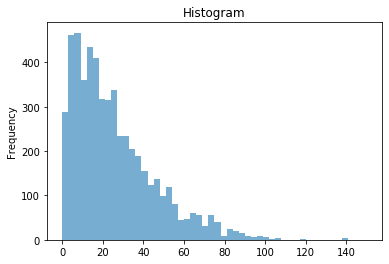

In [27]:
df_dist_peninsula['Distancia'].plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6,
        range=[0, 150])

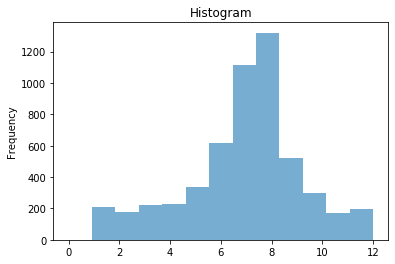

In [29]:
df_dist_peninsula['Mes'].plot(kind='hist',
        bins=13,
        title='Histogram',
        alpha=0.6,
        range=[0, 12])

In [28]:
df_dist_peninsula['Mortal'].plot(kind='hist',
        bins=2,
        title='Histogram',
        alpha=0.6,
        range=[0, 1])

KeyError: 'Mortal'

In [ ]:
#sns.pairplot(df_dist_peninsula, hue="Fecha")
